In [1]:
include("interpolation.jl")

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


┌ Info: Precompiling PrettyTables [08abe8d2-0d0c-5749-adfa-8a2ac140af0d]
└ @ Base loading.jl:1342


spinterp

# Кубические сплайны

Кусочно-линейный интерполянт непрерывен, но имеет разрывную производную. Можно построить интерполянт с более гладкими свойствами.

```{index} интерполяция; кубическим сплайном
```
```{index} кубический сплайн
```
(definition_cubicspline)=
```{proof:definition} Кубический сплайн
**Кубический сплайн** $S(x)$ это кусочно-кубическая функция, при этом дважды непрерывно-дифференцируемая на всём интервале интерполяции.
```

Допустим, задана $n+1$ абсцисса $t_0 < t_1 < ... < t_n$ с соответствующими значениями $y_0, y_1, ..., y_n$. На каждом из $n$ отрезков $[t_{k-1}, t_k]$ сплайн $S_k(x)$ имеет вид

```{math}
:label: spline

S_k(x) = a_k + (x-t_{k-1})b_k + (x-t_{k-1})^2 c_k + (x-t_{k-1})^3 d_k, \quad k = 1,...,n.
```

Таким образом, для построения сплайна необходимо знать $4n$ коэффициентов $a_k$, $b_k$, $c_k$ и $d_k$.

Из {numref}`Определения {number} <definition_cubicspline>` сплайна можно составить систему уравнений из условий на

1. Значения сплайна в узлах;
2. Гладкость первой производной;
3. Гладкость второй производной.

Также, как оказывается, понадобятся ещё граничные условия. Ниже приведён вывод системы {cite}`fnc2017`.

## Условия непрерывности сплайна

**1. Непрерывность в узлах интерполяции.**

Сама задача интерполяции требует $S(t_k) = y_k$, $k=0,...,n$. Это условие достигается при $S_k(t_{k-1}) = y_{k-1}$, $S_k(t_k) = y_k$, где $k=1,...,n$.

**1.а.** Условие $S_k(t_{k-1}) = y_{k-1}$ при подстановке в {eq}`spline` приводит к

```{math}
a_k = y_{k-1}, \quad k = 1, ..., n.
```

Матричный вид этого условия

```{math}
:label: spline_nodes_a

\begin{bmatrix}
\mathbf{I} & \mathbf{0} & \mathbf{0} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}
\mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_{n-1}
\end{bmatrix},
```
где $\mathbf{I}$ единичная $n\times n$ матрица, $\mathbf{0}$ нулевая $n\times n$ матрица; $\mathbf{a}$, $\mathbf{b}$, $\mathbf{c}$ и $\mathbf{d}$ векторы $n\times 1$ искомых коэффициентов $a_k$, $b_k$, $c_k$ и $d_k$ соответственно.

**1.б.** Условие $S_k(t_k) = y_k$ приводит к 

```{math}
a_k + h_k b_k + h^2_k c_k + h^3_k d_k = y_k,\quad h_k = y_k - y_{k-1},\: k=1,...,n.
```

В матричном виде

```{math}
:label: spline_nodes_b

\begin{bmatrix}
\mathbf{I} & \mathbf{H} & \mathbf{H}^2 & \mathbf{H}^3
\end{bmatrix}
\begin{bmatrix}
\mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix},
```
где $\mathbf{H} = \diag(h_1, h_2, ..., h_n)$ &ndash; диагольная матрица из $h_k$.

Итак, системы {eq}`spline_nodes_a` и {eq}`spline_nodes_b` дают $2n$ уравнений.

**2. Непрерывность первой производной.**

Чтобы добиться гладкости первой производной $S(x)$ сплайна, потребуем сшивку производных в узловых точках для соседних кусков $S'_k(t_k) = S'_{k+1}(t_k)$. Тогда, из {eq}`spline` получим

```{math}
b_k + 2 h_k\cdot c_k + 3h^2_k\cdot d_k = b_{k+1},\quad k=1,...,n-1.
```

В явном матричном виде это записывается так

```{math}
\left[
\begin{array}{cccc|cccc|cccc|cccc}
0 &        &        &   & 1 & -1     &        &    & 2h_1 &        &        &      & 3h^2_1 &        &        &        \\
  & \ddots &        &   &   & \ddots & \ddots &    &      & \ddots &        &      &        & \ddots &        &        \\
  &        & \ddots &   &   &        & \ddots & -1 &      &        & \ddots &      &        &        & \ddots &        \\
  &        &        & 0 &   &        &        & 1  &      &        &        & 2h_{n-1} &        &        &        & 3h^2_{n-1}
\end{array}
\right]
\begin{bmatrix}
a_1 \\ \vdots \\ a_{n-1} \\ b_1 \\ \vdots \\ b_{n-1} \\ c_1 \\ \vdots \\ c_{n-1} \\ d_1 \\ \vdots \\ d_{n-1}
\end{bmatrix}
=
\mathbf{0}_{(n-1)\times 1}
```

В этой записи блоки в матрице имеют размер $(n-1)\times(n-1)$, а вектор неизвестных не имеет коэффициентов $a_n$, $b_n$, $c_n$ и $d_n$. Чтобы встроить эту систему в общую, мы формально увеличим матрицы до $n\times n$, а вектор неизвестных до $4n$. Чтобы получить эквивалентную систему, нужно будет только "удалить" $n$-ую строку

```{math}
:label: spline_deriv

\mathbf{E}
\begin{bmatrix}
\mathbf{0} & \mathbf{J} & 2 \mathbf{H} & 3 \mathbf{H}^2
\end{bmatrix}
\begin{bmatrix}
\mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
=
\mathbf{0}_{(n-1)\times 1},
```

здесь блочные матрицы уже размера $n\times n$, а матрица $\mathbf{E}$ "удаляет" последнюю строку произведения $[\mathbf{0}\:\mathbf{J}\:2\mathbf{H}\:3 \mathbf{H}^2][\mathbf{a}^\top\:\mathbf{b}^\top\:\mathbf{c}^\top\:\mathbf{d}^\top]^\top$. Матрица $\mathbf{E}$ имеет размер $(n-1)\times n$ и выглядит как единичная без последней строки

```{math}
\mathbf{E}_{(n-1)\times n} =
\begin{bmatrix}
1 & 0 & \cdots & \cdots & 0 \\
0 & \ddots & & & \vdots \\
\vdots & & \ddots & & \vdots \\
0 & \cdots & 0 & 1 & 0
\end{bmatrix}.
```

Матрица $\mathbf{J}$ двудиагональная, размера $n\times n$

```{math}
\mathbf{J}_{n\times n} = 
\begin{bmatrix}
1 & -1 & & \\
  & \ddots & \ddots & \\
  &    &  \ddots & -1 \\
  & & & 1
\end{bmatrix}.
```

Итак, система {eq}`spline_deriv` содержит $n-1$ уравнение.

**3. Непрерывность второй производной.**

Аналогично условию на первую производную, требуем для второй $S''_k(t_k) = S''_{k+1}(t_k)$. Из определения $S_k$ {eq}`spline` получаем

```{math}
2 c_k  + 6h_k d_k = 2 c_{k+1},\quad k=1,...,n-1.
```

Матричный вид системы

```{math}
:label: spline_dderiv

\mathbf{E}
\begin{bmatrix}
\mathbf{0} & \mathbf{0} & \mathbf{J} & 3 \mathbf{H}
\end{bmatrix}
=
\mathbf{0}_{(n-1)\times 1}.
```

В итоге получаем $n-1$ уравнение.

## Граничные условия

```{index} кубический сплайн; not-a-knot
```
На данном этапе у нас есть $4n$ неизвестных и $2n + 2(n-1) = 4n - 2$ уравнения. Чтобы замкнуть систему, понадобятся граничные условия. Бывает так, что они известны, т.е. известны $S'$ и/или $S''$ на концах отрезка. Если они не известны, то популярными являются условия *not-a-knot*

```{math}
S'''_1(t_1) = S_2'''(t_1),\quad S'''_{n-1}(t_{n-1}) = S'''_n(t_{n-1}).
```

Что приводит к уравнениям

```{math}
:label: spline_edge

d_1 = d_2, \quad d_{n-1} = d_n.
```

Которым можно сопоставить соответствующие строки, и встроить их в уже существующую систему.

Итак, уравнения {eq}`spline_nodes_a`, {eq}`spline_nodes_b`, {eq}`spline_deriv`, {eq}`spline_dderiv` и {eq}`spline_edge` формируют систему для $4n$ неизвестных, с квадратной матрицей размера $(4n) \times (4n)$. В отличие от кусочно-линейной интерполяции, интерполяция сплайнами требует решения линейной системы. Оказывается, для сплайнов всё-таки можно найти базис, но он не будет обладать свойством {eq}`cardinality`.

## Реализация

:::{proof:function} polynomial

**Полином общего вида** $c_1 + c_2 x + c_3 x^2 + ...$ **.**

```julia
"Возвращает полином вида `c[1] + c[2]*x + c[3]*x^2 + ...`."
polynomial(c) = x -> horner(c, x)
```
:::

:::{proof:function} pwlininterp

**Кубический сплайн** $S(x)$

Создание блочной матрицы смотрите в {numref}`Демонстрации {number} <demo_create_block_matrix>`.

```julia
"Возвращает кубический сплайн, проходящий через точки (`t[i]`, `y[i]`)"
function spinterp(t, y)
    n = size(t, 1) - 1
    
    In = I(n)
    E = In[1:end-1, :]
    J = diagm(0 => ones(n), 1 => -ones(n-1)) 
    Z = zeros(n, n)
    h = [t[k+1] - t[k] for k in 1:n]
    H = diagm(0 => h)
    
    # 1.а Значения на левой границе
    AL = [In Z Z Z]
    vL = y[1:end-1]
    
    # 1.б Значения на правой границе
    AR = [In H H^2 H^3]
    vR = y[2:end]
    
    # 2. Непрерывность первой производной
    A1 = E * [Z J 2*H 3*H^2]
    v1 = zeros(n-1)

    # 3. Непрерывность второй производной
    A2 = E * [Z Z J 6*H]
    v2 = zeros(n-1)
    
    # 4. Not-a-knot
    nakL = [zeros(1, 3*n) 1 -1 zeros(1, n-2)]  # слева
    nakR = [zeros(1, 3*n) zeros(1, n-2) 1 -1]  # справа
    
    # Собираем систему и решаем
    A = [AL; AR; A1; A2; nakL; nakR]
    v = [vL; vR; v1; v2; 0; 0]
    coefs = A \ v
    
    # Разбираем коэффициенты
    a = coefs[1:n]
    b = coefs[n+1:2*n]
    c = coefs[2*n+1:3*n]
    d = coefs[3*n+1:4*n]
    
    S = [polynomial([a[k], b[k], c[k], d[k]]) for k in 1:n]
    
    return function (x)
        if x < first(t) || x > last(t)
            return NaN
        elseif x == first(t)
            return first(y)
        else
            k = findlast(x .> t)  # k такое, что x ∈ (tₖ₋₁, tₖ)
            return S[k](x - t[k])
        end
    end
end
```
:::

## Сходимость

В случае сплайнов, подобно кусочно-линейной интерполяции, справедливо утверждение

```{index} сходимость; кубического сплайна
```
```{proof:proposition} Cходимость кубического сплайна

Для функции $f(x)$, имеющей четвёртую непрерывную производную на отрезке $[a,b]$ и её кубического сплайна $S_h(x)$, узлы которого определены на равномерной сетке $\omega_h$, найдётся число $C$, такое что, справедлива оценка

$$
\|f - S_h\|_\infty \le C h^4.
$$

Т.е. кубический сплайн сходится к функции с *четвёртым* порядком.
```

```{proof:demo}
```

```{raw} html
<div class="demo">
```

Функция $f(x)=\exp(\sin(2x)) + 0.05\sin(15x)$.

Построение по 7 выбранным точкам.

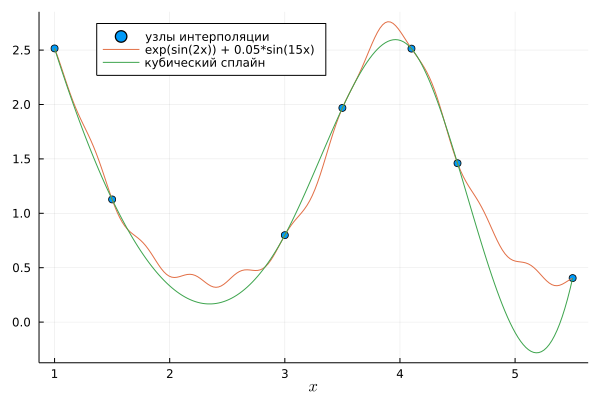

In [2]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = [1.0, 1.5, 3.0, 3.5, 4.1, 4.5, 5.5]

ys = foo.(ts)

interpolant = spinterp(ts, ys)

scatter(ts, ys; label="узлы интерполяции", legend=:top, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, foo.(xs); label="exp(sin(2x)) + 0.05*sin(15x)")
plot!(xs, interpolant.(xs); label="кубический сплайн")

**Случай равноотстоящих точек**

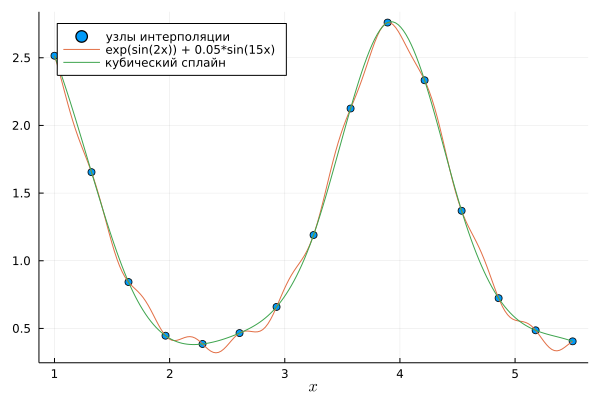

In [3]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
ts = range(1, 5.5; length=15)

ys = foo.(ts)

interpolant = spinterp(ts, ys)

scatter(ts, ys; label="узлы интерполяции", legend=:topleft, xlabel=L"x")
xs = range(first(ts), last(ts); length=200)
plot!(xs, foo.(xs); label="exp(sin(2x)) + 0.05*sin(15x)")
plot!(xs, interpolant.(xs); label="кубический сплайн")

**Оценка порядка сходимости**

В этом случае мы ожидаем увидеть прямую с наклоном 4 в log-log осях.

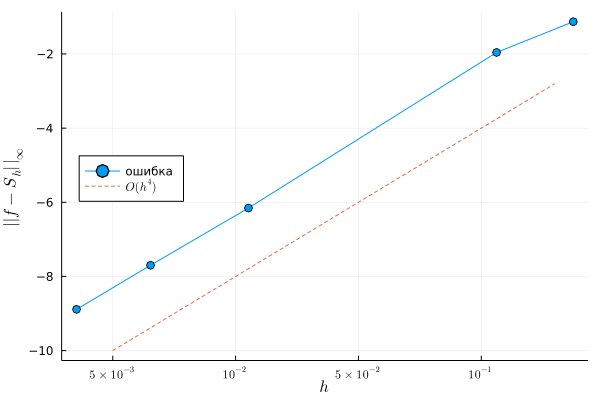

In [4]:
foo(x) = exp(sin(2x)) + 0.05*sin(15x)
a, b = [1, 5.5]
xs = range(a, b; length=10000)
mesh_h = []
err = []
for n in (20, 40, 400, 1000, 2000)
    ts = range(a, b; length=n)
    h = (b - a) / (n - 1)
    ys = foo.(ts)
    interpolant = spinterp(ts, ys)
    Δ = norm(foo.(xs) - interpolant.(xs), Inf)
    push!(mesh_h, h)
    push!(err, Δ)
end
plot(log10.(mesh_h), log10.(err);
    m=:o, label="ошибка", leg=:left, xlabel=L"h", ylabel=L"||f-S_h||_\infty",
)
plot!([-2.5, -0.7], [-10, -2.8]; line=:dash, label=L"O(h^4)")
xticks!(
    [-2.5, -2, -1.5, -1.0],
    [L"5\times10^{-3}", L"10^{-2}", L"5\times10^{-2}", L"10^{-1}"]
)

```{raw} html
</div>
```